In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%run ../database.ipynb

In [3]:
df = pd.DataFrame(get_all_content())

Average Sentiment Score by Search Keyword:
search_keyword
Sumerian anthropology    0.964334
ancient anthropology     0.802341
ancient china            0.540828
ancient culture          0.571447
china and sumer          0.595824
china sumer              0.461023
chinese and sumerian     0.653166
chinese sumerian         0.567054
old china                0.438716
shang dynasty            0.826774
sumer                    0.682935
sumerian                 0.589556
sumerian chinese         0.485018
sumerian civilization    0.793214
sumerian history         0.931426
xia dynasty              0.782067
Name: siebert_sentiment_score, dtype: float64


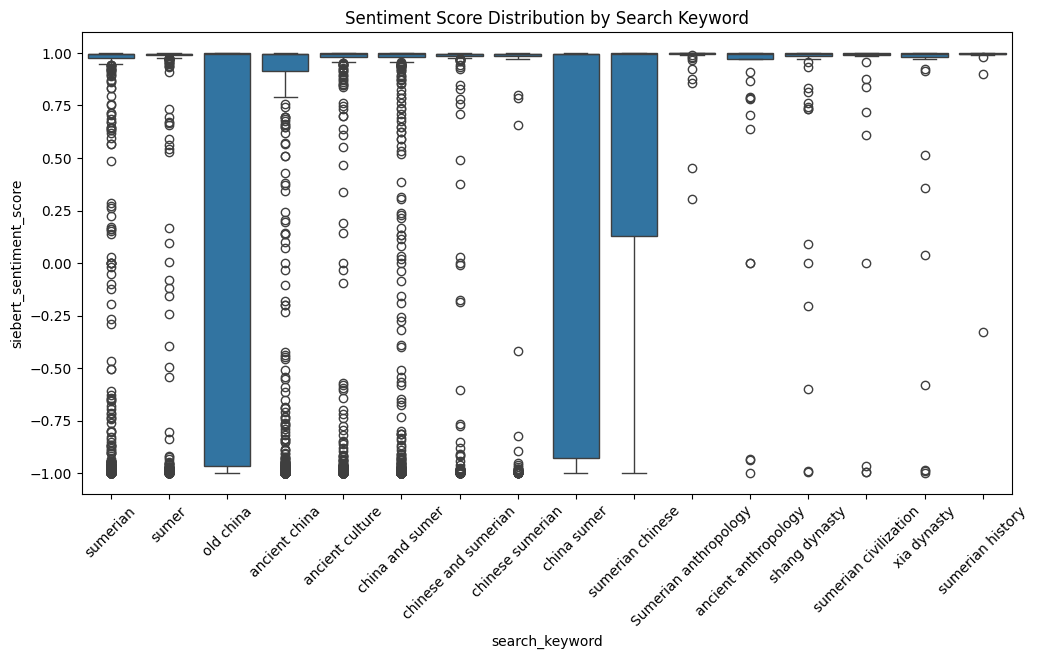

In [ ]:
avg_sentiment_by_keyword = df.groupby('search_keyword')['siebert_sentiment_score'].mean()
print("Average Sentiment Score by Search Keyword:")
print(avg_sentiment_by_keyword)

plt.figure(figsize=(12, 6))
sns.boxplot(x='search_keyword', y='siebert_sentiment_score', data=df)
plt.title("Sentiment Score Distribution by Search Keyword")
plt.xticks(rotation=45)
plt.show()

<h1>Sentiment over topic modeling<h1>

In [ ]:
from collections import Counter

sentiment_label_list = df['siebert_sentiment_label'].tolist()
topic_list = df['topics'].tolist()

topic_sentiments = {}

for i in range(len(sentiment_label_list)):
    dominant_topic = max(topic_list[i], key=lambda x: x["probability"])["topic_id"]
    sentiment = sentiment_label_list[i]

    if dominant_topic not in topic_sentiments:
        topic_sentiments[dominant_topic] = []
    topic_sentiments[dominant_topic].append(sentiment)

sentiment_distribution = {}
for topic, sentiments in topic_sentiments.items():
    sentiment_distribution[topic] = dict(Counter(sentiments))

for topic, distribution in sentiment_distribution.items():
    print(f"Topic {topic}: {distribution}")

Topic 16: {'POSITIVE': 515, 'NEGATIVE': 195, 'NEUTRAL': 2}
Topic 18: {'POSITIVE': 404, 'NEGATIVE': 85, 'NEUTRAL': 1}
Topic 11: {'POSITIVE': 563, 'NEGATIVE': 90, 'NEUTRAL': 3}
Topic 17: {'POSITIVE': 611, 'NEGATIVE': 244, 'NEUTRAL': 3}
Topic 2: {'NEGATIVE': 218, 'POSITIVE': 887}
Topic 5: {'NEGATIVE': 117, 'POSITIVE': 488}
Topic 7: {'NEGATIVE': 313, 'POSITIVE': 599, 'NEUTRAL': 3}
Topic 0: {'NEGATIVE': 75, 'NEUTRAL': 13, 'POSITIVE': 190}
Topic 8: {'POSITIVE': 429, 'NEGATIVE': 83, 'NEUTRAL': 2}
Topic 6: {'NEGATIVE': 24, 'POSITIVE': 86}
Topic 12: {'POSITIVE': 592, 'NEGATIVE': 92, 'NEUTRAL': 3}
Topic 13: {'POSITIVE': 482, 'NEGATIVE': 62, 'NEUTRAL': 1}
Topic 15: {'NEGATIVE': 72, 'POSITIVE': 399}
Topic 19: {'NEGATIVE': 52, 'POSITIVE': 271, 'NEUTRAL': 1}
Topic 4: {'POSITIVE': 711, 'NEGATIVE': 93, 'NEUTRAL': 1}
Topic 1: {'POSITIVE': 535, 'NEGATIVE': 123, 'NEUTRAL': 1}
Topic 14: {'POSITIVE': 174, 'NEGATIVE': 67}
Topic 3: {'POSITIVE': 234, 'NEGATIVE': 33}
Topic 9: {'POSITIVE': 660, 'NEGATIVE': 239,

In [30]:
sentiment_distribution

{16: {'POSITIVE': 515, 'NEGATIVE': 195, 'NEUTRAL': 2},
 18: {'POSITIVE': 404, 'NEGATIVE': 85, 'NEUTRAL': 1},
 11: {'POSITIVE': 563, 'NEGATIVE': 90, 'NEUTRAL': 3},
 17: {'POSITIVE': 611, 'NEGATIVE': 244, 'NEUTRAL': 3},
 2: {'NEGATIVE': 218, 'POSITIVE': 887},
 5: {'NEGATIVE': 117, 'POSITIVE': 488},
 7: {'NEGATIVE': 313, 'POSITIVE': 599, 'NEUTRAL': 3},
 0: {'NEGATIVE': 75, 'NEUTRAL': 13, 'POSITIVE': 190},
 8: {'POSITIVE': 429, 'NEGATIVE': 83, 'NEUTRAL': 2},
 6: {'NEGATIVE': 24, 'POSITIVE': 86},
 12: {'POSITIVE': 592, 'NEGATIVE': 92, 'NEUTRAL': 3},
 13: {'POSITIVE': 482, 'NEGATIVE': 62, 'NEUTRAL': 1},
 15: {'NEGATIVE': 72, 'POSITIVE': 399},
 19: {'NEGATIVE': 52, 'POSITIVE': 271, 'NEUTRAL': 1},
 4: {'POSITIVE': 711, 'NEGATIVE': 93, 'NEUTRAL': 1},
 1: {'POSITIVE': 535, 'NEGATIVE': 123, 'NEUTRAL': 1},
 14: {'POSITIVE': 174, 'NEGATIVE': 67},
 3: {'POSITIVE': 234, 'NEGATIVE': 33},
 9: {'POSITIVE': 660, 'NEGATIVE': 239, 'NEUTRAL': 2},
 10: {'POSITIVE': 463, 'NEGATIVE': 150, 'NEUTRAL': 1}}

In [ ]:
topics = sorted(sentiment_distribution.keys())
positive_counts = [sentiment_distribution[t].get('POSITIVE', 0) for t in topics]
negative_counts = [sentiment_distribution[t].get('NEGATIVE', 0) for t in topics]
neutral_counts = [sentiment_distribution[t].get('NEUTRAL', 0) for t in topics]

In [35]:
x = np.arange(len(topics))
width = 0.3

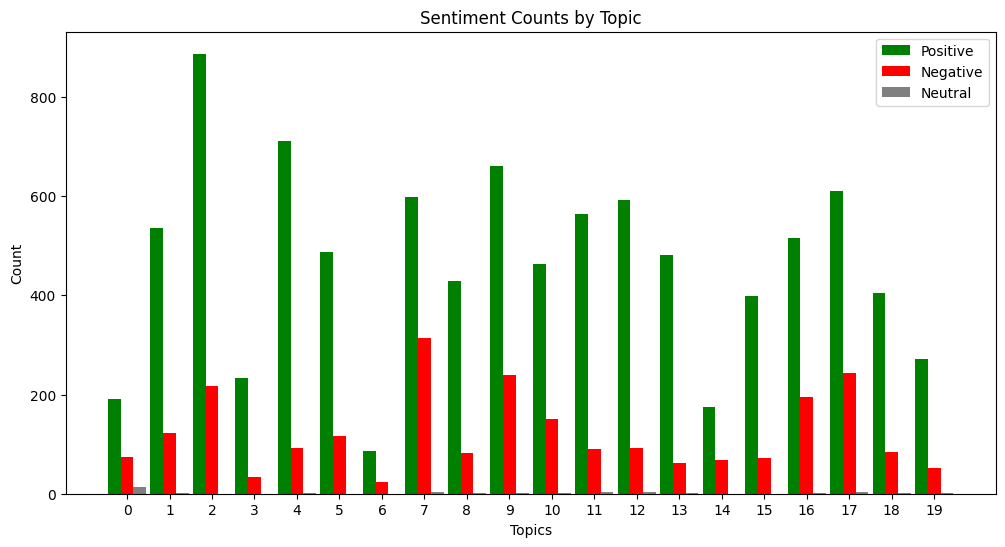

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, positive_counts, width, label='Positive', color='green')
ax.bar(x, negative_counts, width, label='Negative', color='red')
ax.bar(x + width, neutral_counts, width, label='Neutral', color='gray')

ax.set_xlabel('Topics')
ax.set_ylabel('Count')
ax.set_title('Sentiment Counts by Topic')
ax.set_xticks(x)
ax.set_xticklabels(topics)
ax.legend()

plt.show()